## import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## set path


In [6]:
data_dir = '/Users/alexbarnett/Documents/Community_detection/hippo_nets/'

## load data

In [7]:
#pathlength_data = pd.read_excel(data_dir+'pathlength_data.xlsx')
pathlength_data = pd.read_excel(data_dir+'pathlength_data_all.xlsx')
pathlength_data_hipp = pd.read_excel(data_dir+'pathlength_data_all_hipp.xlsx')

In [15]:
## remove redundant networks fewer than 10 regions
pathlength_data_select =pathlength_data[pathlength_data['Removed_Network']!='SAL2']
pathlength_data_select = pathlength_data_select[pathlength_data_select['Removed_Network']!='DAN1']

In [16]:
## remove redundant networks fewer than 10 regions
pathlength_data_hipp_select =pathlength_data_hipp[pathlength_data_hipp['Removed_Network']!='SAL2']
pathlength_data_hipp_select = pathlength_data_hipp_select[pathlength_data_hipp_select['Removed_Network']!='DAN1']

In [17]:
pathlength_data_select['Removed_Network']=pathlength_data_select['Removed_Network']

## plot pathlength after network deletion

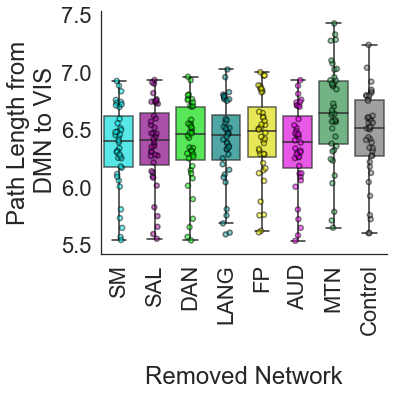

In [18]:
plt.figure(figsize=(6,6))
sns.set(font_scale=2)
sns.set_style("white")

labels = ['SM','SAL','DAN','LANG','FP','AUD','MTN','Control']
colors = ["#00FFFF","#A300A3","#00FF00","#009C9A","#FFFF00","#FF00FF","#34A853","#808080"];
figure_one = sns.boxplot(x = "Removed_Network_number", y = "Path_Length",
                                data = pathlength_data_select, linewidth=1.5,palette=colors,
                         fliersize=0,boxprops=dict(alpha=.75))
sns.stripplot(x = "Removed_Network_number", y = "Path_Length", data = pathlength_data_select, edgecolor="black",
              linewidth=1.5,size=5,alpha = .5,jitter = 0.1,dodge=True, palette = colors)
sns.despine()

figure_one.set(xlabel="\nRemoved Network", ylabel="Path Length from\n DMN to VIS")
figure_one.set_xticklabels(labels,rotation=90)
#figure_one.set_ylim(5,7.75)

fig = figure_one.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(data_dir+"pathlength_fig.pdf",dpi=300)

In [19]:
md = smf.mixedlm("Path_Length ~ Removed_Network", pathlength_data_select, groups=pathlength_data_select["subj"])

mdf = md.fit()

print(mdf.summary())


                    Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       Path_Length
No. Observations:         320           Method:                   REML       
No. Groups:               40            Scale:                    0.0070     
Min. group size:          8             Log-Likelihood:           217.9455   
Max. group size:          8             Converged:                Yes        
Mean group size:          8.0                                                
-----------------------------------------------------------------------------
                                   Coef. Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                          6.350    0.059 107.868 0.000  6.235  6.466
Removed_Network[T.DAN2]            0.036    0.019   1.921 0.055 -0.001  0.073
Removed_Network[T.FP]              0.087    0.019   4.647 0.000  0.050  0.124
Remove

In [22]:
options = ['Spatial Control','MTL']


md = smf.mixedlm("Path_Length ~ Removed_Network", pathlength_data.loc[pathlength_data['Removed_Network'].isin(options)], groups=pathlength_data.loc[pathlength_data['Removed_Network'].isin(options)]["subj"])

mdf = md.fit()

print(mdf.summary())


                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        Path_Length
No. Observations:        80             Method:                    REML       
No. Groups:              40             Scale:                     0.0238     
Min. group size:         2              Log-Likelihood:            -18.1356   
Max. group size:         2              Converged:                 Yes        
Mean group size:         2.0                                                  
------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                           6.641    0.064 103.946 0.000  6.515  6.766
Removed_Network[T.Spatial Control] -0.189    0.034  -5.483 0.000 -0.256 -0.121
Group Var                           0.140    0.315                       

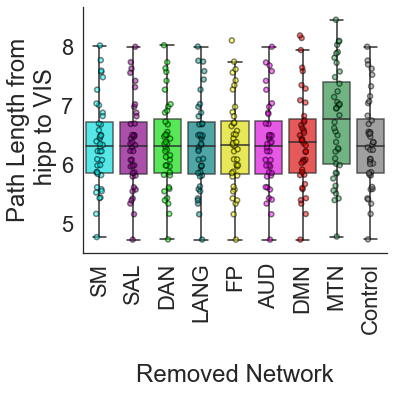

In [23]:
plt.figure(figsize=(6,6))
sns.set(font_scale=2)
sns.set_style("white")

labels = ['SM','SAL','DAN','LANG','FP','AUD','DMN','MTN','Control']
colors = ["#00FFFF","#A300A3","#00FF00","#009C9A","#FFFF00","#FF00FF","#ff0000","#34A853","#808080"];
figure_one = sns.boxplot(x = "Removed_Network", y = "Path_Length",
                                data = pathlength_data_hipp_select, linewidth=1.5,
                         fliersize=0,boxprops=dict(alpha=.75),palette=colors)
sns.stripplot(x = "Removed_Network", y = "Path_Length", data = pathlength_data_hipp_select, edgecolor="black",
              linewidth=1.5,size=5,alpha = .5,jitter = 0.1,dodge=True,palette=colors)
sns.despine()

figure_one.set(xlabel="\nRemoved Network", ylabel="Path Length from\n hipp to VIS")
figure_one.set_xticklabels(labels,rotation=90)
#figure_one.set_ylim(5,7.75)

fig = figure_one.get_figure()
fig.tight_layout(h_pad = 0)
fig.savefig(data_dir+"pathlength_fig_hippo.pdf",dpi=300)

In [24]:
options = ['Spatial Control','MTL']


md = smf.mixedlm("Path_Length ~ Removed_Network", pathlength_data_hipp.loc[pathlength_data_hipp['Removed_Network'].isin(options)], groups=pathlength_data_hipp.loc[pathlength_data_hipp['Removed_Network'].isin(options)]["subj"])

mdf = md.fit()

print(mdf.summary())


                    Mixed Linear Model Regression Results
Model:                    MixedLM       Dependent Variable:       Path_Length
No. Observations:         80            Method:                   REML       
No. Groups:               40            Scale:                    0.0535     
Min. group size:          2             Log-Likelihood:           -63.0017   
Max. group size:          2             Converged:                Yes        
Mean group size:          2.0                                                
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           6.724    0.132 50.915 0.000  6.466  6.983
Removed_Network[T.Spatial Control] -0.364    0.052 -7.039 0.000 -0.465 -0.263
Group Var                           0.644    0.929                           

